*Importing necessery modules and libraries*

In [2]:
import tensorflow as tf

2023-07-21 17:11:31.173087: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 17:11:31.631607: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 17:11:31.638610: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 17:11:33.302236: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


*Loading mnist datasets*

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

*Preparing data for training*

In [4]:
#Padding the train and test data
x_train = tf.pad(x_train, [[0, 0], [2,2], [2, 2]])
x_test = tf.pad(x_test, [[0, 0], [2,2], [2, 2]])

#Normal scalling the data
x_train = x_train/255
x_test = x_test/255

#Converting the data into a 4D data
x_train = tf.expand_dims(x_train, axis=3)
x_test = tf.expand_dims(x_test, axis=3)

#Creating validation data from train data
x_val = x_train[:20000,:, :, :]
x_train = x_train[20000:, :, :, :]
y_val = y_train[:20000]
y_train = y_train[20000:]

2023-07-21 17:11:35.892471: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.
2023-07-21 17:11:35.988589: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.
2023-07-21 17:11:36.037139: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245760000 exceeds 10% of free system memory.
2023-07-21 17:11:36.110625: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245760000 exceeds 10% of free system memory.
2023-07-21 17:11:36.304620: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40960000 exceeds 10% of free system memory.


In [5]:
x_train.shape[1:]

TensorShape([32, 32, 1])

*Building Linet5 model*

In [6]:
inputs = tf.keras.layers.Input(shape= (32, 32, 1), dtype=tf.float32)
conv_layer1 = tf.keras.layers.Conv2D(6, 5, activation='tanh',input_shape = [32, 32, 1] )(inputs)
avgPooling1 = tf.keras.layers.AveragePooling2D(2)(conv_layer1)
actvnLayer1 = tf.keras.layers.Activation('sigmoid')(avgPooling1)
conv_layer2 = tf.keras.layers.Conv2D(16, 5, activation='tanh')(actvnLayer1)
avgPooling2 = tf.keras.layers.AveragePooling2D(2)(conv_layer2)
actvnLayer2 = tf.keras.layers.Activation('sigmoid')(avgPooling2)
conv_layer3 = tf.keras.layers.Conv2D(120, 5, activation='tanh')(actvnLayer2)
flattenLayer = tf.keras.layers.Flatten()(conv_layer3)
x = tf.keras.layers.Dense(84, activation='tanh')(flattenLayer)
output = tf.keras.layers.Dense(10, activation='softmax')(x)
linet5 = tf.keras.Model(inputs, output)
linet5.compile(optimizer='adam', loss =tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])



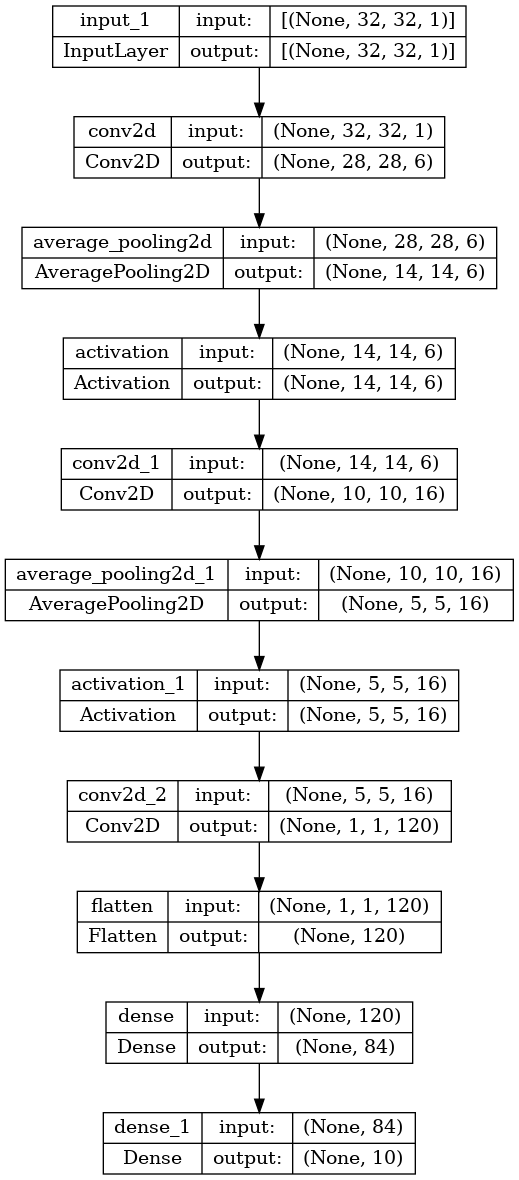

In [7]:
from keras.utils import plot_model
plot_model(linet5, to_file='./model.png', show_shapes=True)

*Training LINET5*

In [8]:
hist = linet5.fit(x_train, y_train, batch_size= 64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
625/625 [==============================] - 11s 16ms/step - loss: 1.7028 - accuracy: 0.3751 - val_loss: 0.6160 - val_accuracy: 0.8056
Epoch 2/40
625/625 [==============================] - 9s 14ms/step - loss: 0.4474 - accuracy: 0.8579 - val_loss: 0.3535 - val_accuracy: 0.8899
Epoch 3/40
625/625 [==============================] - 9s 14ms/step - loss: 0.3259 - accuracy: 0.8980 - val_loss: 0.3027 - val_accuracy: 0.9064
Epoch 4/40
625/625 [==============================] - 9s 14ms/step - loss: 0.2726 - accuracy: 0.9136 - val_loss: 0.2727 - val_accuracy: 0.9136
Epoch 5/40
625/625 [==============================] - 9s 15ms/step - loss: 0.2440 - accuracy: 0.9226 - val_loss: 0.2300 - val_accuracy: 0.9276
Epoch 6/40
625/625 [==============================] - 9s 15ms/step - loss: 0.2157 - accuracy: 0.9303 - val_loss: 0.2278 - val_accuracy: 0.9251
Epoch 7/40
625/625 [==============================] - 9s 15ms/step - loss: 0.2060 - accuracy: 0.9336 - val_loss: 0.1815 - val_accuracy: 0.942

In [9]:
linet5.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0748 - accuracy: 0.9774


[0.07475405931472778, 0.977400004863739]

*Saving the model*

In [10]:
linet5.save("./linet5")

INFO:tensorflow:Assets written to: ./linet5/assets


INFO:tensorflow:Assets written to: ./linet5/assets
